# Project 4, APS1070 Fall 2024
#### **Linear Regression -  14 points**
**Deadline: Nov 29th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Ziren Wang
*   Your **student number**: 1007004386

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

In [ ]:
%%shell
jupyter nbconvert --to html /content/F24_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/F24_APS1070_Project_4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 1799079 bytes to /content/F24_APS1070_Project_4.html


## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts electrical grid stability, as described in the paper below:

*Schäfer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.*


For this purpose, we are using the [Electrical Grid Stability](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data) dataset which includes 10000 instances with 12 features describing the power grid's status. The goal is to unravel patterns and predict the `stab` column, which is a characteristic of the grid that represents its stability. Note that you can ignore the last column named `stabf` since this is a binary indicator showing whether the stability is above a certain threshold.

In [ ]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/Sabaae/Dataset/main/electrical_grid_stability_simulated_data.csv",
    skipinitialspace=True
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=111`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [ ]:
print(df)

from sklearn.model_selection import train_test_split

data = df.drop(columns=['stabf'])
# Drop the 'stabf' column

X = data.drop(columns=['stab'])
y = data['stab']
# Separate features and target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=111)
# Split the dataset

import numpy as np

mean = X_train.mean()
std = X_train.std()

X_train_scaled = (X_train - mean) / std
X_val_scaled = (X_val - mean) / std
# Standardization

X_train_scaled.insert(0, 'new', 1)
X_val_scaled.insert(0, 'new', 1)

print(X_train_scaled.head())
print(X_val_scaled.head())
# Print a few rows to verify


          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

The column of 1 must be added after normalization to ensure that they act only as bias terms in the model. If a column of 1's is added before normalization, its value will change, destroying its function as a bias term. Adding them after normalization ensures that they are not affected by scaling, maintaining the integrity of the intercept, while ensuring that all other features are properly normalized for consistent weight updates in the model.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `root_mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

X_train_features = X_train_scaled.values
y_train_target = y_train.values
# make it into numpy
X_val_features = X_val_scaled.values
y_val_target = y_val.values

X_train_transpose = X_train_features.T
beta = inv(X_train_transpose @ X_train_features) @ (X_train_transpose @ y_train_target)
# use the formula to calculate

y_train_pred = X_train_features @ beta
y_val_pred = X_val_features @ beta

rmse_train = rmse(y_train_target, y_train_pred)
rmse_val = rmse(y_val_target, y_val_pred)
# get the rmse

print("RMSE on Training Set:", rmse_train)
print("RMSE on Validation Set:", rmse_val)

RMSE on Training Set: 0.021962483722235665
RMSE on Validation Set: 0.021846042289310374


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.0005 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.0005$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

    **Hint**: Initialize your weights with small random numbers (<$0.00001$) & please set **np.random.seed(1001)**

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

--- Total Training Time: 0.29 seconds ---
Converged after 175 epochs.
Final Training RMSE: 0.021982653068538426
Final Validation RMSE: 0.02185677897002718
Final Weights: [ 1.55758120e-02  9.56838388e-03  1.01923639e-02  9.90657019e-03
  1.00188068e-02 -5.62830408e-05  2.41438116e-04  3.98410255e-04
 -5.14948967e-04  1.00901193e-02  1.02746450e-02  1.08281317e-02
  1.00601376e-02]


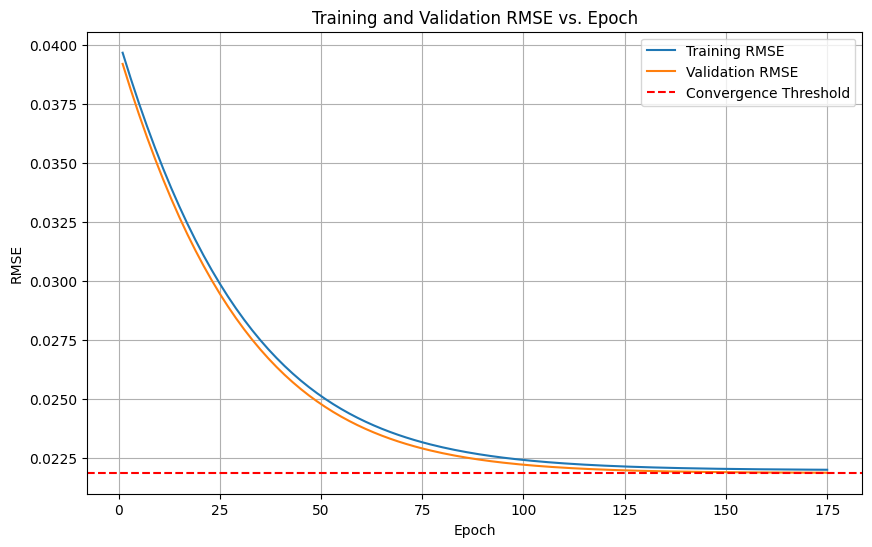

In [ ]:
import time
import matplotlib.pyplot as plt

convergence_threshold = rmse_val * 1.0005

# Full-batch Gradient Descent function
def full_batch_gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.01, max_epochs=1000):
    np.random.seed(1001)
    weights = np.random.randn(X_train.shape[1]) * 0.00001

    train_rmse_history = []
    val_rmse_history = []

    start_time = time.time()
    # record the time

    for epoch in range(max_epochs):
        y_train_pred = X_train @ weights
        gradient = (-2 / X_train.shape[0]) * (X_train.T @ (y_train - y_train_pred))
        # use whole dataset for Full batch GD

        weights = weights - learning_rate * gradient

        train_rmse = rmse(y_train, X_train @ weights)
        val_rmse = rmse(y_val, X_val @ weights)

        train_rmse_history.append(train_rmse)
        val_rmse_history.append(val_rmse)

        if val_rmse <= convergence_threshold:
            break
    # iterate every epoch, break if less then CT

    end_time = time.time()

    print("--- Total Training Time: {:.2f} seconds ---".format(end_time - start_time))
    print(f"Converged after {epoch + 1} epochs.")
    print("Final Training RMSE:", train_rmse)
    print(f"Final Validation RMSE:", val_rmse)
    print("Final Weights:", weights)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_rmse_history) + 1), train_rmse_history, label="Training RMSE")
    plt.plot(range(1, len(val_rmse_history) + 1), val_rmse_history, label="Validation RMSE")
    plt.axhline(y=convergence_threshold, color='r', linestyle='--', label='Convergence Threshold')
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Epoch")
    plt.legend()
    plt.grid(True)
    plt.show()
    # plot the process of converge

    return weights, train_rmse_history, val_rmse_history

weights, train_rmse_history, val_rmse_history = full_batch_gradient_descent(X_train_features, y_train_target, X_val_features, y_val_target)


From the plot, the training and validation RMSE decrease and remain close throughout the epochs. This indicates that the model is neither overfitting nor underfitting. overfitting or underfitting would show both RMSE values remaining high. The current trend suggests the model generalizes well on the validation set.

An epoch represents one complete pass over the entire training dataset, and an iteration means a single weight update based on a subset of the data. For the mini-batch gradient descent method, an epoch is iterated multiple times depending on the batch size. The smaller the batch size, the more iterations per epoch The full batch gradient descent method has only one iteration per epoch because it processes all the data at once.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(1001)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(1001)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:

def has_converged(rmse_history, threshold, window_size=10, tolerance=0.001):
    if len(rmse_history) < window_size:
        return False
    recent_rmse = rmse_history[-window_size:]
    return np.mean(recent_rmse) <= threshold and np.std(recent_rmse) < tolerance
# define a function to check if rmse converges


# Mini-batch Gradient Descent function
def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, learning_rate=0.01, max_epochs=1000):
    np.random.seed(1001)
    weights = np.random.rand(X_train.shape[1]) * 0.00001

    n_train = X_train.shape[0]
    # row of the x train

    train_rmse_history = []
    val_rmse_history = []
    elapsed_time = []

    start_time = time.time()

    for epoch in range(max_epochs):
        indices = np.random.permutation(n_train)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        # randomly shuffle x_train and y_train

        for i in range(0, n_train, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            # take mini batch of data from shuffled data

            y_pred_batch = X_batch @ weights
            gradient = (-2 / batch_size) * (X_batch.T @ (y_batch - y_pred_batch))
            # the rest of the function same as previous

            weights -= learning_rate * gradient

        train_rmse = rmse(y_train, X_train @ weights)
        val_rmse = rmse(y_val, X_val @ weights)

        train_rmse_history.append(train_rmse)
        val_rmse_history.append(val_rmse)

        elapsed_time.append(time.time() - start_time)
        if has_converged(val_rmse_history, convergence_threshold, window_size=10):
          break


    end_time = time.time()
    print("--- Total Training Time: {:.2f} seconds ---".format(end_time - start_time))


    return weights, train_rmse_history, val_rmse_history, elapsed_time

batch_size = 32
# Mini-batch size

weights, train_rmse_history, val_rmse_history, elapsed_time = mini_batch_gradient_descent(
    X_train_features, y_train_target, X_val_features, y_val_target,
    batch_size
)
# Run mini-batch gradient descent

print("Final Training RMSE:", train_rmse_history[-1])
print("Final Validation RMSE:", val_rmse_history[-1])
print("Final Weights:", weights)


--- Total Training Time: 6.59 seconds ---
Final Training RMSE: 0.021985174803898576
Final Validation RMSE: 0.021840542155889684
Final Weights: [ 0.01607364  0.00994939  0.00997732  0.00973106  0.0101663  -0.0001647
  0.00017343  0.00028917 -0.00016162  0.00984722  0.01069245  0.01095541
  0.0102085 ]


Training Batch Size = 4
--- Total Training Time: 34.83 seconds ---
Training Batch Size = 8
--- Total Training Time: 21.96 seconds ---
Training Batch Size = 16
--- Total Training Time: 13.24 seconds ---
Training Batch Size = 32
--- Total Training Time: 5.61 seconds ---
Training Batch Size = 64
--- Total Training Time: 0.16 seconds ---
Training Batch Size = 128
--- Total Training Time: 0.06 seconds ---
Training Batch Size = 256
--- Total Training Time: 0.05 seconds ---
Training Batch Size = 512
--- Total Training Time: 0.05 seconds ---
Training Batch Size = 1024
--- Total Training Time: 0.07 seconds ---


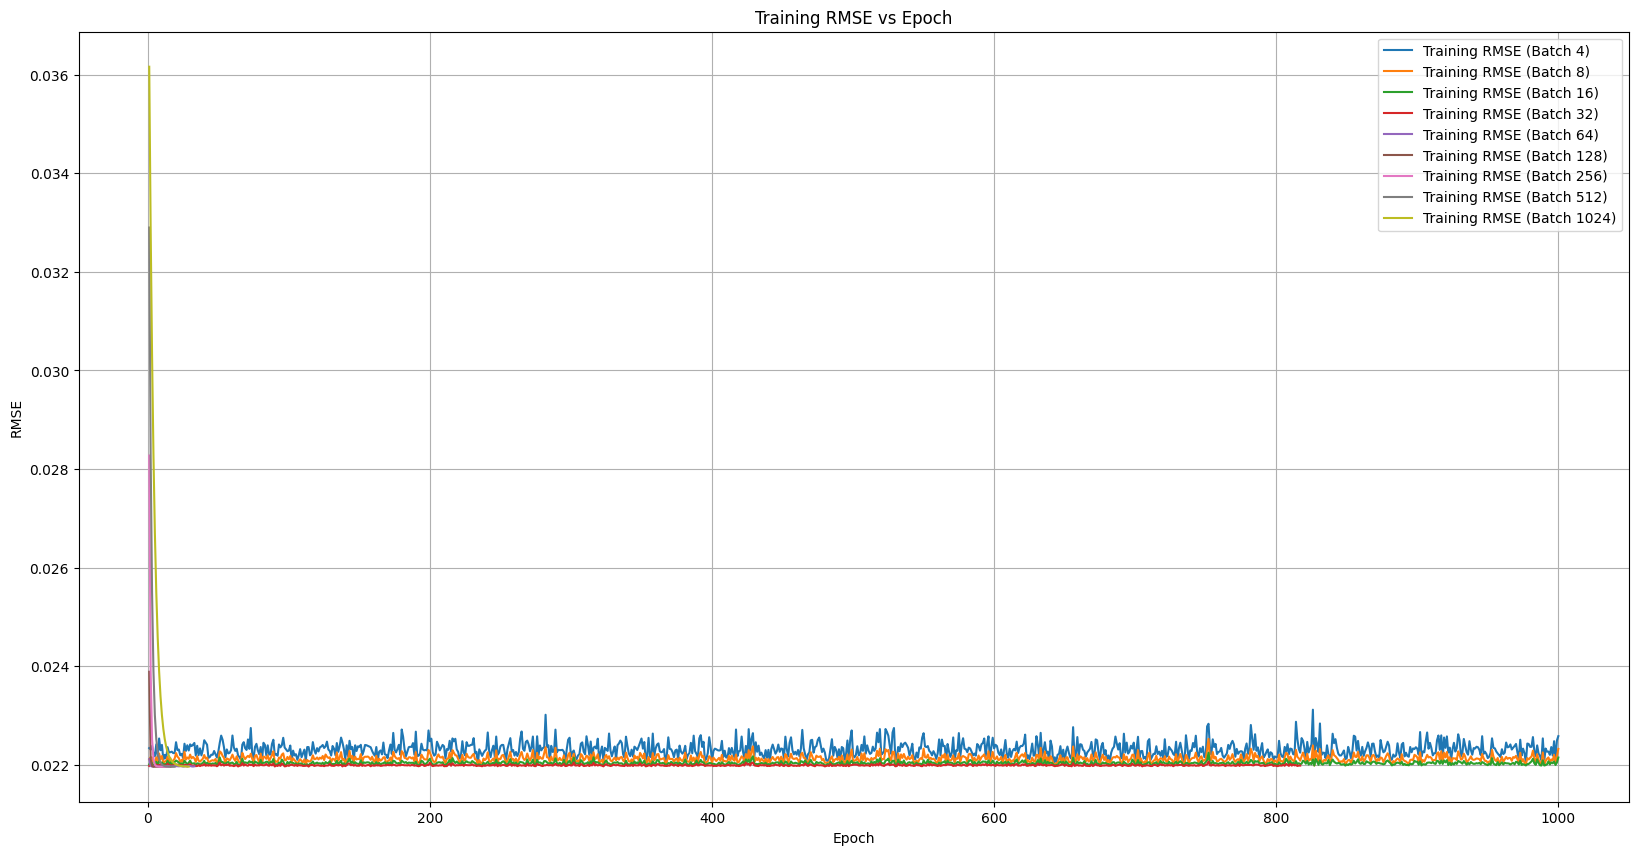

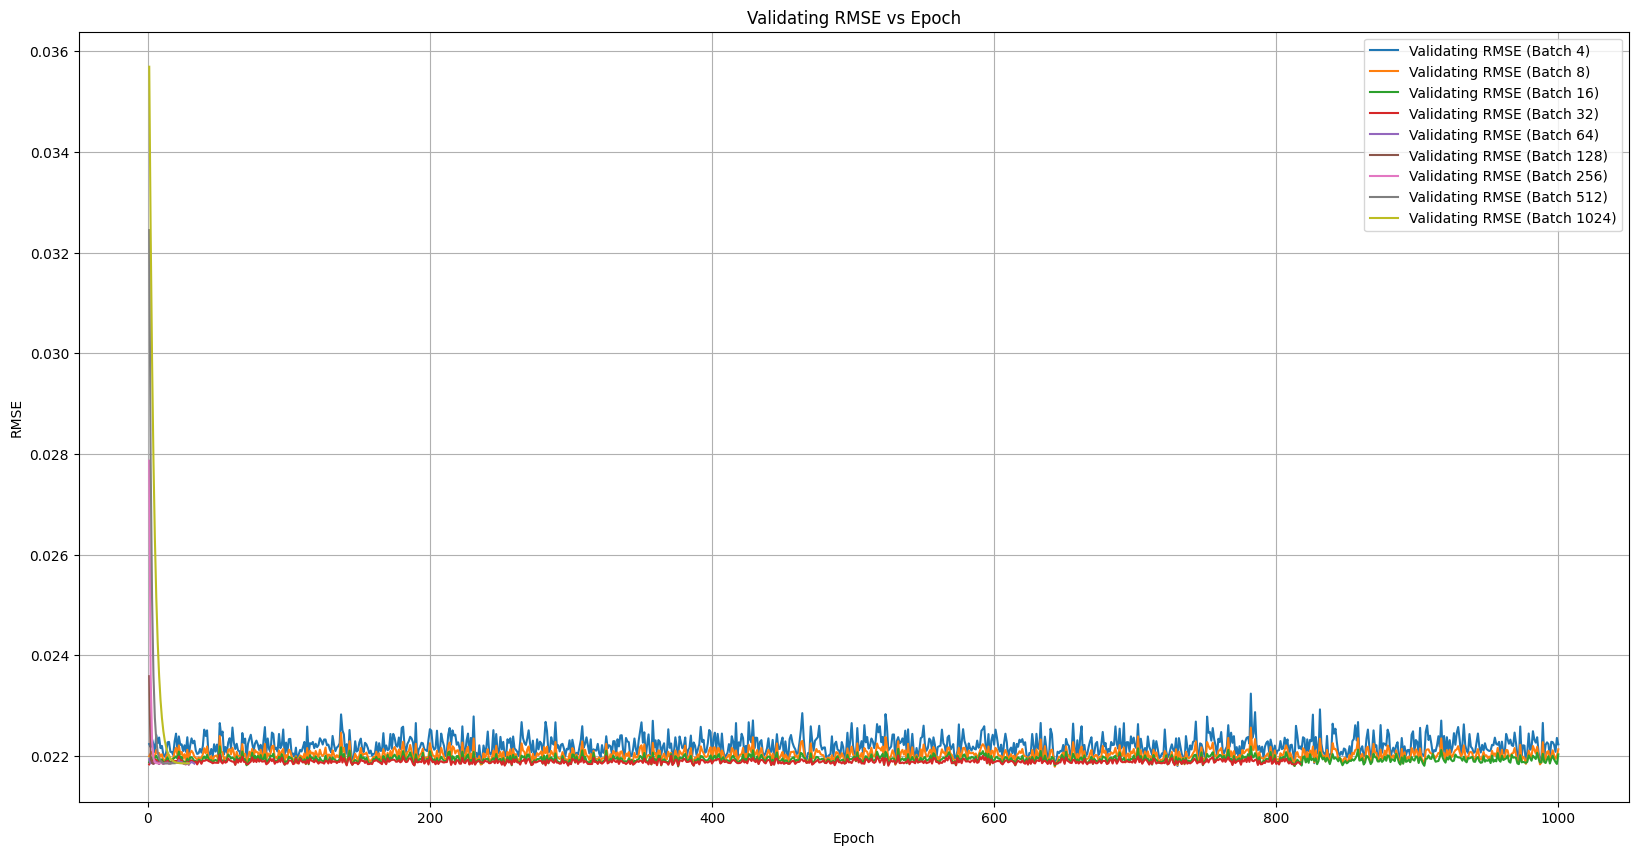

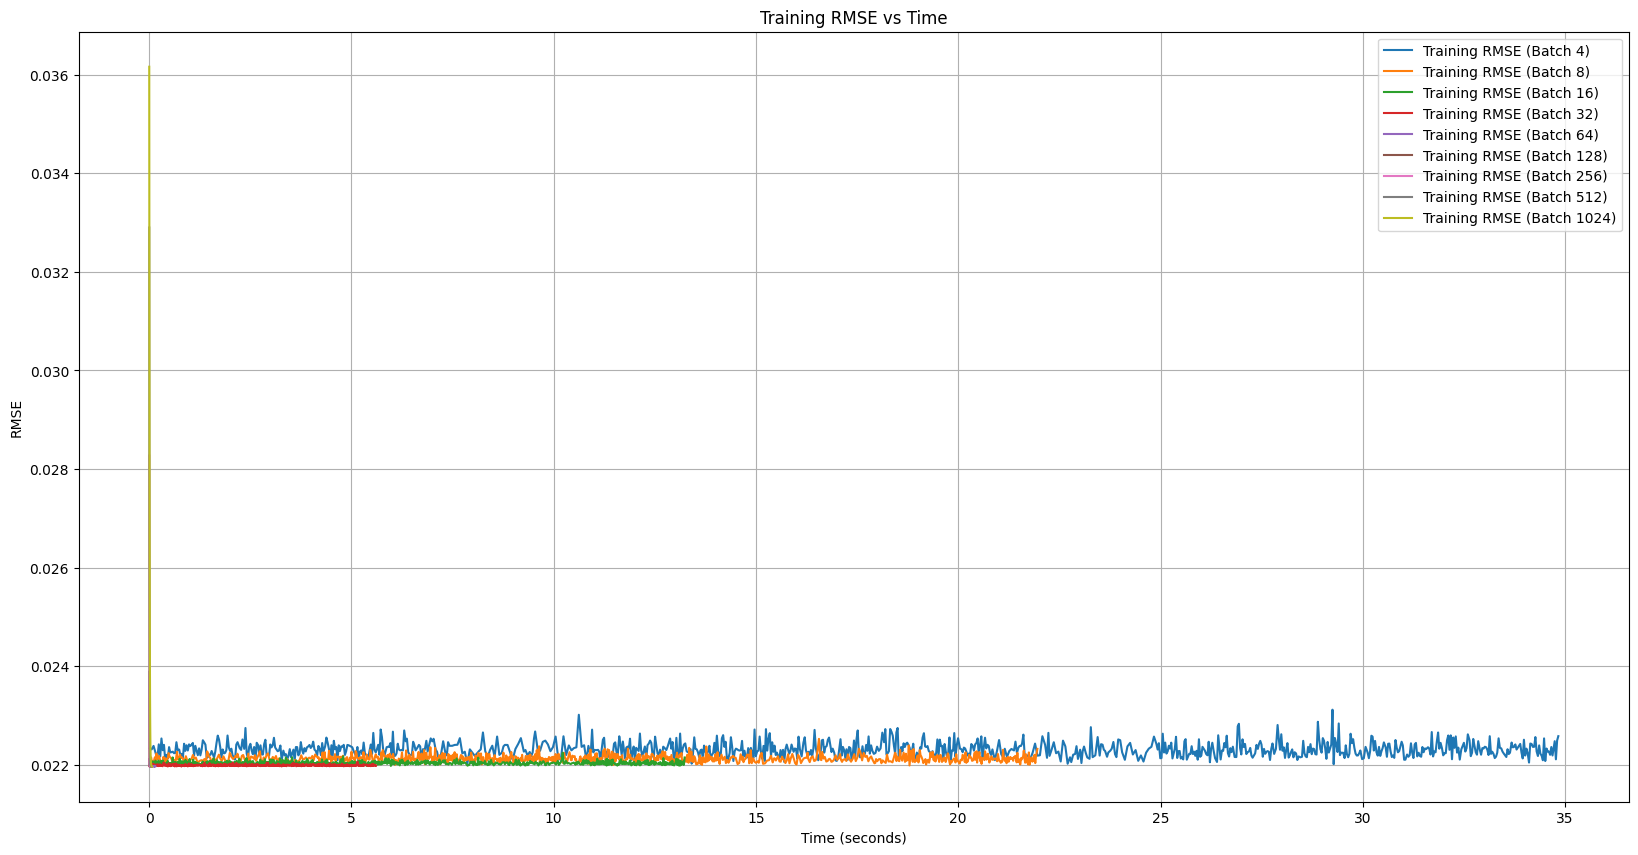

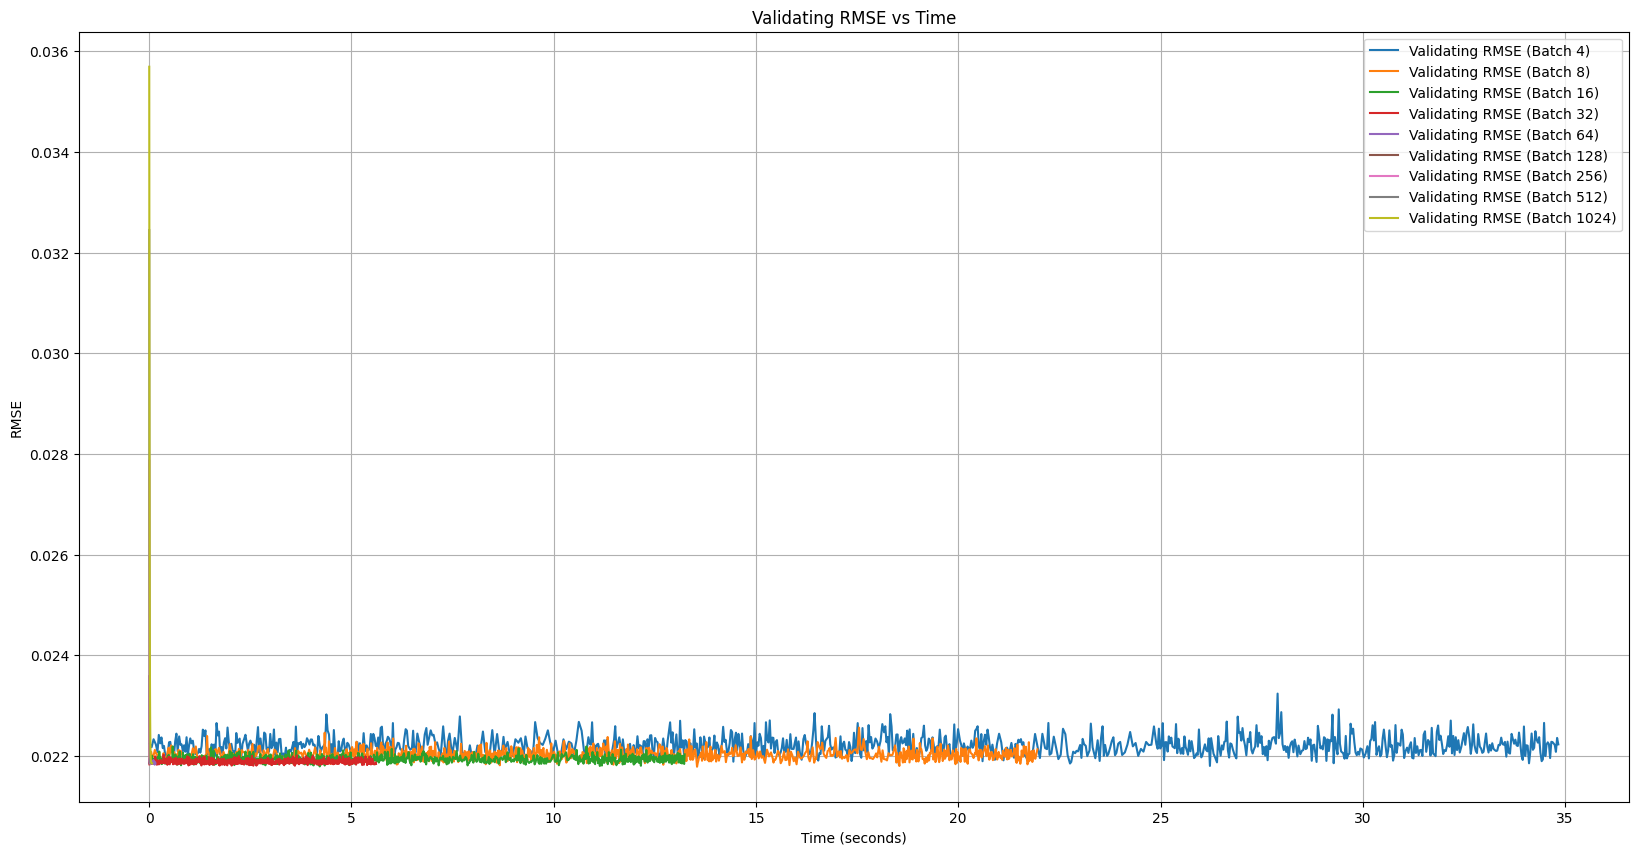

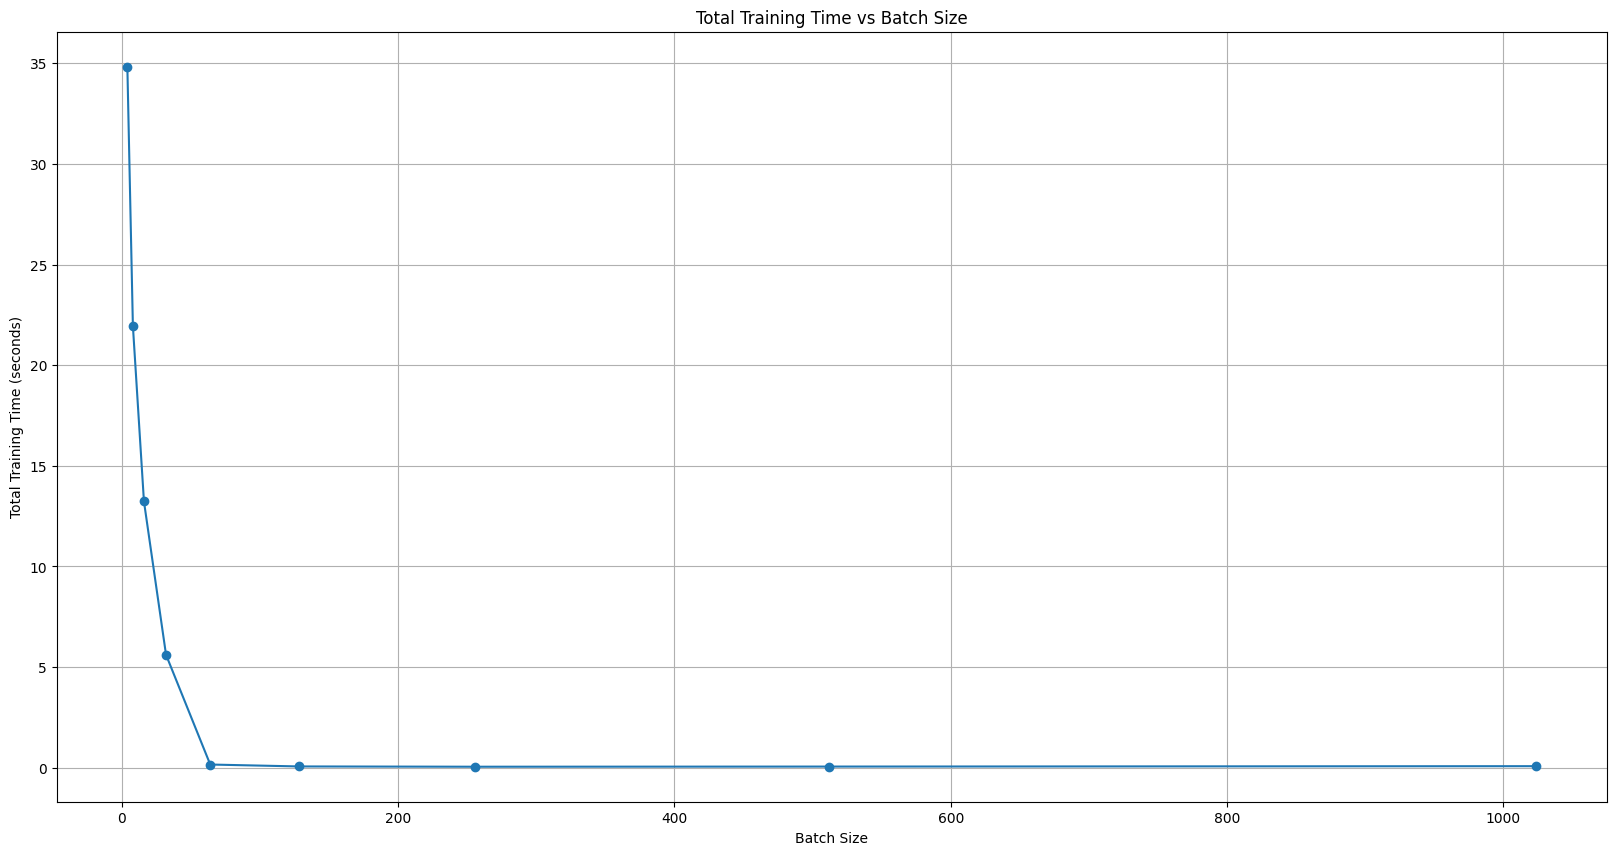

In [ ]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

rmse_histories = {}
training_times = {}

for batch_size in batch_sizes:
    print(f"Training Batch Size = {batch_size}")
    weights, train_rmse_history, val_rmse_history, elapsed_time = mini_batch_gradient_descent(
        X_train_features, y_train_target, X_val_features, y_val_target,
        batch_size
    )
    rmse_histories[batch_size] = (train_rmse_history, val_rmse_history, elapsed_time)
    training_times[batch_size] = elapsed_time[-1]
# iterate every batch size and see which one didn't converge

plt.figure(figsize=(20, 10))
for batch_size, (train_rmse, _, _) in rmse_histories.items():
    plt.plot(range(1, len(train_rmse) + 1), train_rmse, label=f"Training RMSE (Batch {batch_size})")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training RMSE vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
for batch_size, (_, val_rmse, _) in rmse_histories.items():
    plt.plot(range(1, len(val_rmse) + 1), val_rmse, label=f"Validating RMSE (Batch {batch_size})")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Validating RMSE vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
for batch_size, (train_rmse, _, elapsed_time) in rmse_histories.items():
    plt.plot(elapsed_time, train_rmse, label=f"Training RMSE (Batch {batch_size})")
plt.xlabel("Time (seconds)")
plt.ylabel("RMSE")
plt.title("Training RMSE vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
for batch_size, (_, val_rmse, elapsed_time) in rmse_histories.items():
    plt.plot(elapsed_time, val_rmse, label=f"Validating RMSE (Batch {batch_size})")
plt.xlabel("Time (seconds)")
plt.ylabel("RMSE")
plt.title("Validating RMSE vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(batch_sizes, list(training_times.values()), marker="o", linestyle="-")
plt.xlabel("Batch Size")
plt.ylabel("Total Training Time (seconds)")
plt.title("Total Training Time vs Batch Size")
plt.grid(True)
plt.show()
# graphs of training/validating rmse vs epoch and time, also batch size


From all the graphs we can see that the smaller the batch size, the more fluctuating the change in rmse will be and it will take longer or more epoch to achieve convergence. Some too small batch sizes don't even converge in 1000 epochs. A larger batch size makes the rmse smoother. We can also see that the training time for a small batch size is much higher than for a larger batch size, but it is not the case that a larger batch size results in a shorter training time. In this example, the shortest time is for a batch size equal to 512.

I split the training and validation graphs into two graphs because it looks too messy with no information at all if they overlap

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
# Function to find converging learning rates for non-converging batch sizes
def test_learning_rates(batch_sizes, learning_rates):
    results = []

    for batch_size in batch_sizes:
        print(f"Testing Batch Size: {batch_size}")
        for learning_rate in learning_rates:
            print(f"  Testing Learning Rate: {learning_rate}")

            weights, train_rmse_history, val_rmse_history, elapsed_time = mini_batch_gradient_descent(
                X_train_features, y_train_target, X_val_features, y_val_target,
                batch_size, learning_rate, max_epochs=1000
            )
            # Run mini-batch gradient descent

            if has_converged(val_rmse_history, convergence_threshold, window_size=10):
                final_train_rmse = train_rmse_history[-1]
                final_val_rmse = val_rmse_history[-1]
                results.append({
                    "Batch Size": batch_size,
                    "Learning Rate": learning_rate,
                    "Final Training RMSE": final_train_rmse,
                    "Final Validation RMSE": final_val_rmse
                })
                # Check if converged
                print(f"    Converged with Learning Rate: {learning_rate}")
                break  # Stop testing once a converging learning rate is found

    return pd.DataFrame(results)


learning_rates_to_test = [0.009, 0.007, 0.005, 0.003, 0.001]
non_converging_batch_sizes = [4, 8, 16]
# from previous part

results_df = test_learning_rates(non_converging_batch_sizes, learning_rates_to_test)

# Display the results table
print("Results of Learning Rate Testing:")
print(results_df)


Testing Batch Size: 4
  Testing Learning Rate: 0.009
--- Total Training Time: 38.38 seconds ---
  Testing Learning Rate: 0.007
--- Total Training Time: 37.14 seconds ---
  Testing Learning Rate: 0.005
--- Total Training Time: 45.72 seconds ---
  Testing Learning Rate: 0.003
--- Total Training Time: 39.10 seconds ---
  Testing Learning Rate: 0.001
--- Total Training Time: 11.99 seconds ---
    Converged with Learning Rate: 0.001
Testing Batch Size: 8
  Testing Learning Rate: 0.009
--- Total Training Time: 23.06 seconds ---
  Testing Learning Rate: 0.007
--- Total Training Time: 21.00 seconds ---
  Testing Learning Rate: 0.005
--- Total Training Time: 23.29 seconds ---
  Testing Learning Rate: 0.003
--- Total Training Time: 17.38 seconds ---
    Converged with Learning Rate: 0.003
Testing Batch Size: 16
  Testing Learning Rate: 0.009
--- Total Training Time: 13.76 seconds ---
  Testing Learning Rate: 0.007
--- Total Training Time: 11.65 seconds ---
    Converged with Learning Rate: 0.007

Best Batch Size Selected: 512
Testing Learning Rate: 0.001
--- Total Training Time: 0.46 seconds ---
Testing Learning Rate: 0.002
--- Total Training Time: 0.24 seconds ---
Testing Learning Rate: 0.003
--- Total Training Time: 0.43 seconds ---
Testing Learning Rate: 0.005
--- Total Training Time: 0.34 seconds ---
Testing Learning Rate: 0.006
--- Total Training Time: 0.29 seconds ---
Testing Learning Rate: 0.007
--- Total Training Time: 0.25 seconds ---
Testing Learning Rate: 0.009
--- Total Training Time: 0.24 seconds ---
Testing Learning Rate: 0.01
--- Total Training Time: 0.19 seconds ---
Testing Learning Rate: 0.02
--- Total Training Time: 0.12 seconds ---
Testing Learning Rate: 0.03
--- Total Training Time: 0.11 seconds ---


<Figure size 1200x800 with 0 Axes>

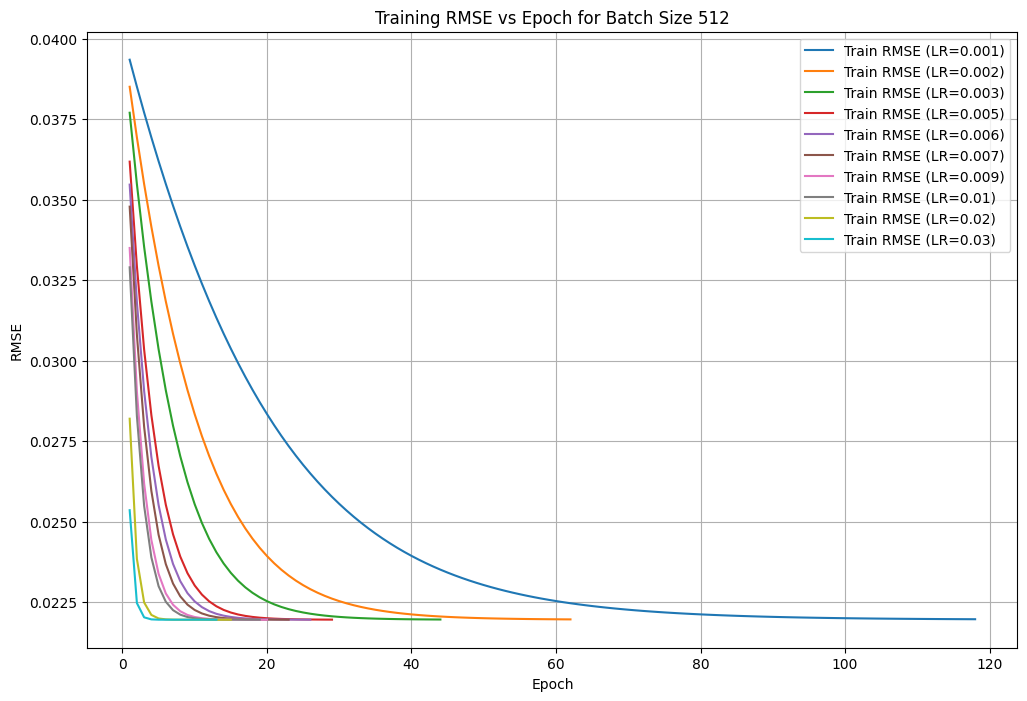

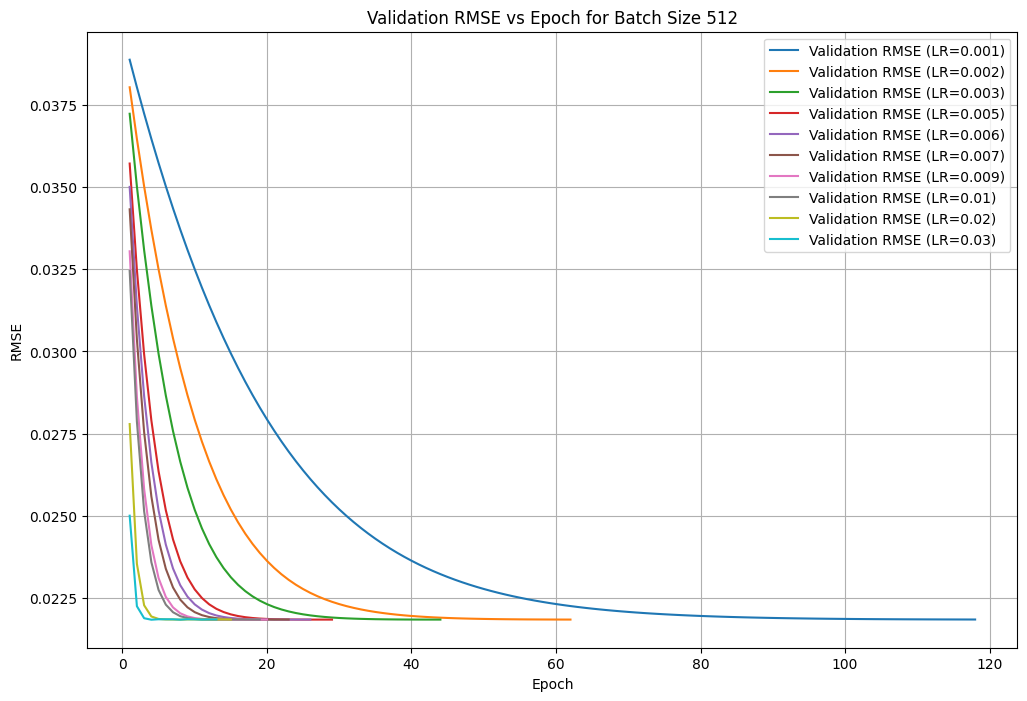

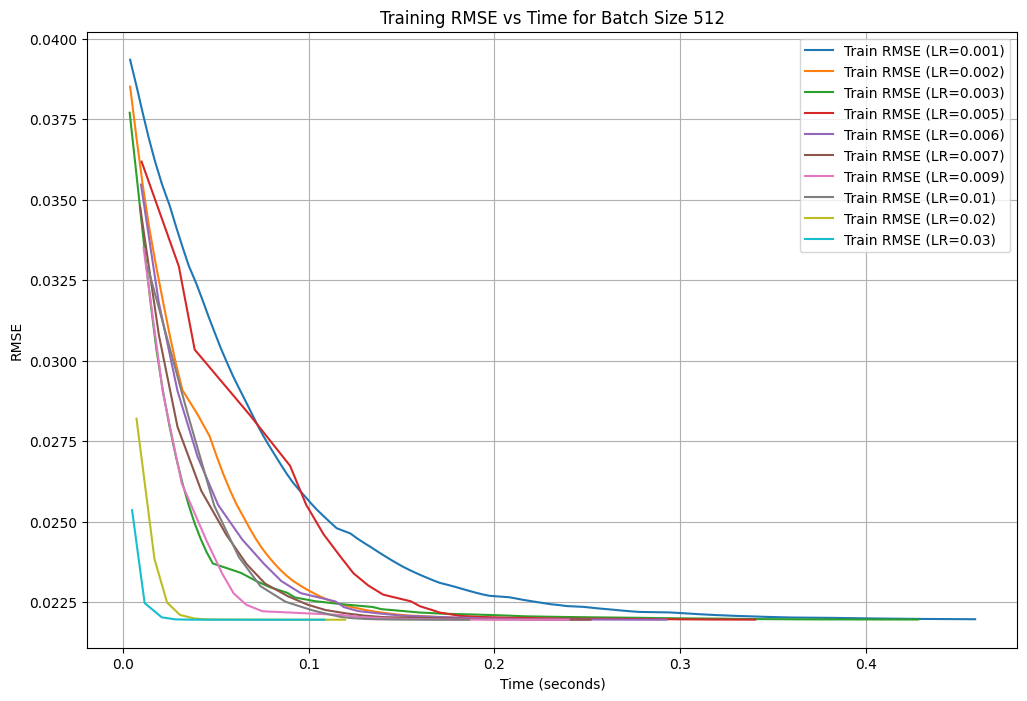

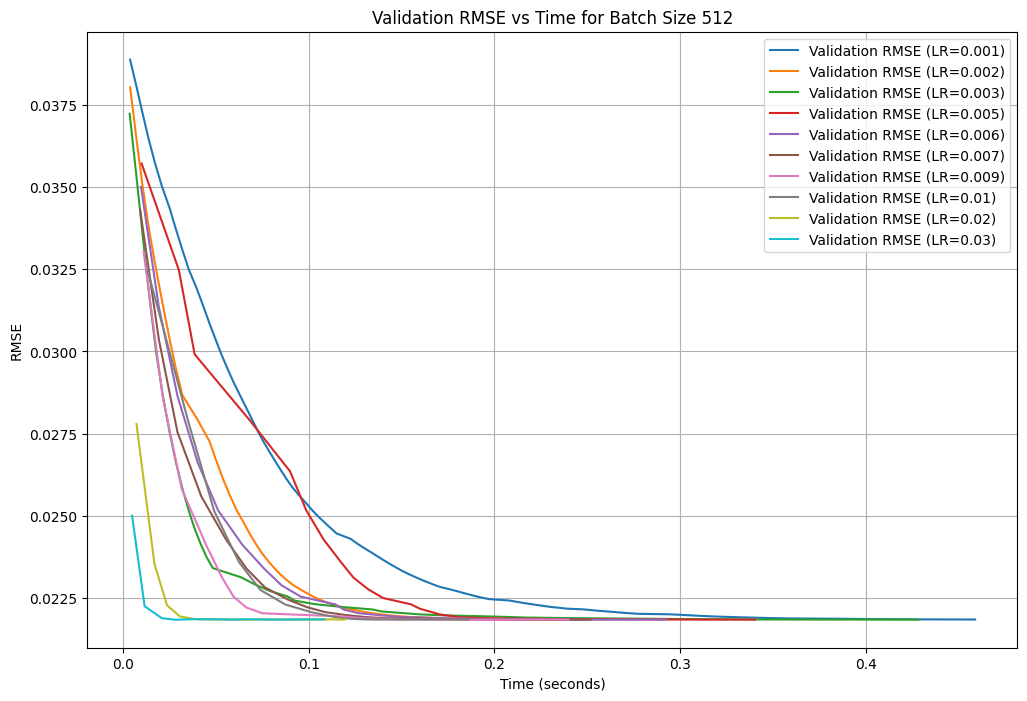

Results of Learning Rate Sweep:
   Learning Rate  Final Training RMSE  Final Validation RMSE  \
0          0.001             0.021977               0.021854   
1          0.002             0.021972               0.021852   
2          0.003             0.021968               0.021852   
3          0.005             0.021965               0.021851   
4          0.006             0.021963               0.021853   
5          0.007             0.021963               0.021853   
6          0.009             0.021962               0.021854   
7          0.010             0.021962               0.021854   
8          0.020             0.021962               0.021854   
9          0.030             0.021962               0.021857   

   Total Training Time  
0             0.458641  
1             0.236494  
2             0.427999  
3             0.340278  
4             0.292501  
5             0.251707  
6             0.239884  
7             0.186225  
8             0.119564  
9            

In [ ]:
# Function to test multiple learning rates for the best batch size and plot results
def sweep_learning_rates_for_best_batch(batch_size, learning_rates):
    results = {}
    plt.figure(figsize=(12, 8))

    print("Best Batch Size Selected:", batch_size)

    for learning_rate in learning_rates:
        print("Testing Learning Rate:", learning_rate)
        weights, train_rmse_history, val_rmse_history, elapsed_time = mini_batch_gradient_descent(
            X_train_features, y_train_target, X_val_features, y_val_target,
            batch_size, learning_rate, max_epochs=10000
        )

        results[learning_rate] = {
            "Training RMSE History": train_rmse_history,
            "Validation RMSE History": val_rmse_history,
            "Elapsed Time": elapsed_time,
            "Final Training RMSE": train_rmse_history[-1],
            "Final Validation RMSE": val_rmse_history[-1]
        }
    # iterate every learning rates and store the values

    plt.figure(figsize=(12, 8))
    for (learning_rate, result) in results.items():
        plt.plot(range(1, len(result["Training RMSE History"]) + 1),
                 result["Training RMSE History"], label=f"Train RMSE (LR={learning_rate})")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title(f"Training RMSE vs Epoch for Batch Size {batch_size}")
    plt.legend()
    plt.grid(True)
    plt.show()
    # RMSE vs. Epoch

    plt.figure(figsize=(12, 8))
    for learning_rate, result in results.items():
        plt.plot(range(1, len(result["Validation RMSE History"]) + 1),
                 result["Validation RMSE History"], label=f"Validation RMSE (LR={learning_rate})")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title(f"Validation RMSE vs Epoch for Batch Size {batch_size}")
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(12, 8))
    for learning_rate, result in results.items():
        plt.plot(result["Elapsed Time"], result["Training RMSE History"],
                 label=f"Train RMSE (LR={learning_rate})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("RMSE")
    plt.title(f"Training RMSE vs Time for Batch Size {batch_size}")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Plot RMSE vs. Time

    plt.figure(figsize=(12, 8))
    for learning_rate, result in results.items():
        plt.plot(result["Elapsed Time"], result["Validation RMSE History"],
                 label=f"Validation RMSE (LR={learning_rate})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("RMSE")
    plt.title(f"Validation RMSE vs Time for Batch Size {batch_size}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # make results in a table format
    results_table = pd.DataFrame([
        {
            "Learning Rate": learning_rate,
            "Final Training RMSE": result["Final Training RMSE"],
            "Final Validation RMSE": result["Final Validation RMSE"],
            "Total Training Time": result["Elapsed Time"][-1]
        }
        for learning_rate, result in results.items()
    ])
    print("Results of Learning Rate Sweep:")
    print(results_table)

    return results_table


# learning rates to sweep
learning_rates = [0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.009, 0.01, 0.02, 0.03]
best_batch_size = 512

results_table = sweep_learning_rates_for_best_batch(best_batch_size, learning_rates)


We can see that after choosing the right batch size, the convergence of the data becomes easy and the graph becomes smooth and not as volatile as before. I drew a graph of how rmse changes with different learning rates, and you can see that only the right learning rate will maximize efficiency. From the table we can tell that a slightly larger learning rate will have a slightly shorter execution time. All learning rate would converge with batch size of 512
